In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Heart_health.csv')
df.head(10)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1
5,6,Emily Davis,30,Female,155,60,105/65,170,75,No,1,0
6,7,Robert Wilson,60,Male,175,82,135/85,230,98,No,3,1
7,8,Amanda Martinez,38,Female,162,68,118/72,195,88,No,2,0
8,9,Christopher Taylor,48,Male,178,78,128/82,205,94,Yes,4,1
9,10,Laura Garcia,42,Female,168,72,120/78,200,90,Yes,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


In [4]:
#data has no null value so cleaning not required

In [5]:
#dropping some column which might not have significant value
df.drop(['ID','Name'],axis=1,inplace=True)
df.head()

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,45,Male,175,80,120/80,200,90,No,3,0
1,35,Female,160,65,110/70,180,80,No,2,0
2,55,Male,180,85,130/85,220,95,Yes,4,1
3,40,Female,165,70,115/75,190,85,No,3,0
4,50,Male,170,75,125/80,210,92,Yes,2,1


In [6]:
df.describe()

,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


In [7]:
labels=['{0}-{1}'.format(i,i+15) for i in range(0,60,15)]
df['age_group']=pd.cut(df['Age'],range(0,75,15),labels=labels)


In [21]:
df.drop('Age',axis=1,inplace=True)
df

,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,age_group
0,Male,175,80,120/80,200,90,No,3,0,30-45
1,Female,160,65,110/70,180,80,No,2,0,30-45
2,Male,180,85,130/85,220,95,Yes,4,1,45-60
3,Female,165,70,115/75,190,85,No,3,0,30-45
4,Male,170,75,125/80,210,92,Yes,2,1,45-60
...,...,...,...,...,...,...,...,...,...,...
719,Female,166,68,118/76,195,88,No,3,0,30-45
720,Male,179,83,123/80,220,100,No,2,1,45-60
721,Female,167,70,120/78,200,92,No,2,0,30-45
722,Male,182,86,125/78,225,98,Yes,2,1,45-60


In [14]:
df['Blood Pressure(mmHg)'].value_counts()

Blood Pressure(mmHg)
125/80    83
122/80    76
125/78    67
122/78    43
119/75    39
118/72    39
121/77    38
124/79    38
118/76    34
120/75    34
121/78    33
124/80    33
116/73    32
120/78    21
123/80    17
132/84     7
110/70     7
126/82     6
113/71     4
124/78     4
112/72     4
133/85     4
109/69     3
130/82     3
123/78     3
116/74     3
128/82     3
117/73     2
115/75     2
135/85     1
130/85     1
117/74     1
105/65     1
108/68     1
119/78     1
123/79     1
115/70     1
118/75     1
130/83     1
120/80     1
Name: count, dtype: int64

In [15]:
100*df['Heart Attack'].value_counts()/len(df['Heart Attack'])

Heart Attack
1    60.31746
0    39.68254
Name: count, dtype: float64

<Axes: xlabel='Heart Attack'>

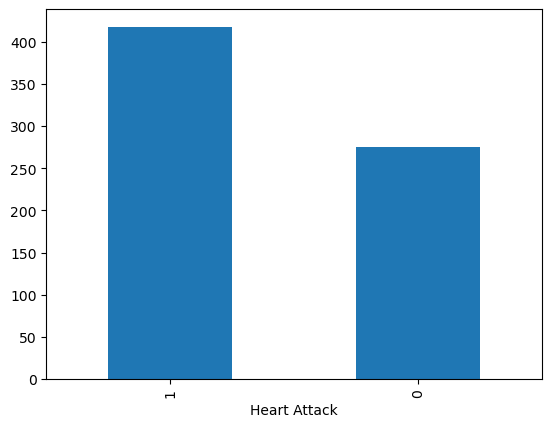

In [16]:
df['Heart Attack'].value_counts().plot(kind='bar')

In [22]:
for i, predictor in enumerate(df.drop(columns=['Heart Attack'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts()) 
    

---------- Gender ----------
Gender
Female    347
Male      346
Name: count, dtype: int64
---------- Height(cm) ----------
Height(cm)
170    109
173     76
169     74
166     72
182     41
162     39
171     37
178     36
177     36
181     34
164     34
167     23
179     20
175      7
180      6
168      5
158      5
176      4
163      4
183      4
159      4
174      4
165      4
161      4
172      4
156      3
160      2
157      1
155      1
Name: count, dtype: int64
---------- Weight(kg) ----------
Weight(kg)
79    79
75    76
68    74
74    41
71    39
82    38
73    38
77    37
81    36
84    36
66    36
72    36
86    34
70    22
83    17
80    10
88     7
63     5
78     5
85     5
89     4
64     4
67     3
65     3
61     3
69     2
87     1
62     1
60     1
Name: count, dtype: int64
---------- Blood Pressure(mmHg) ----------
Blood Pressure(mmHg)
125/80    83
122/80    76
125/78    67
122/78    43
119/75    39
118/72    39
121/77    38
124/79    38
118/76    34
120/75   

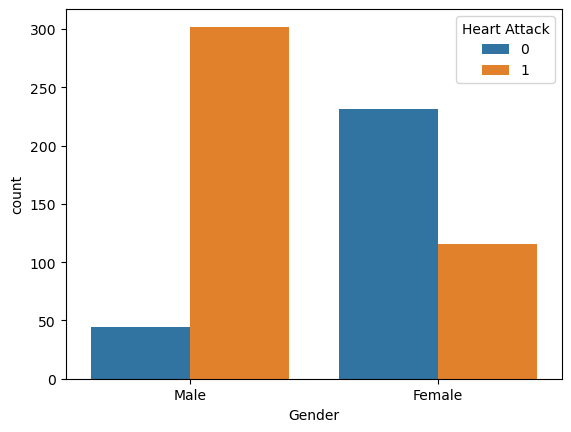

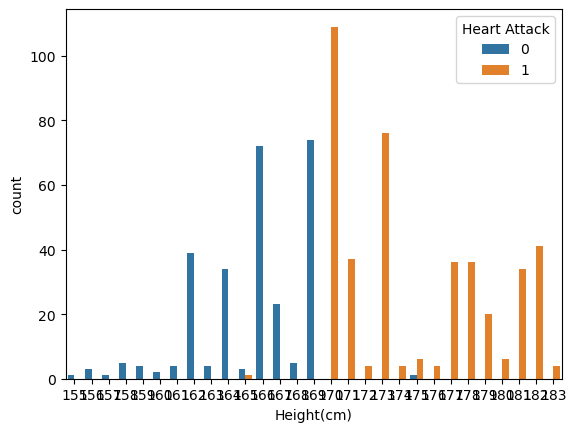

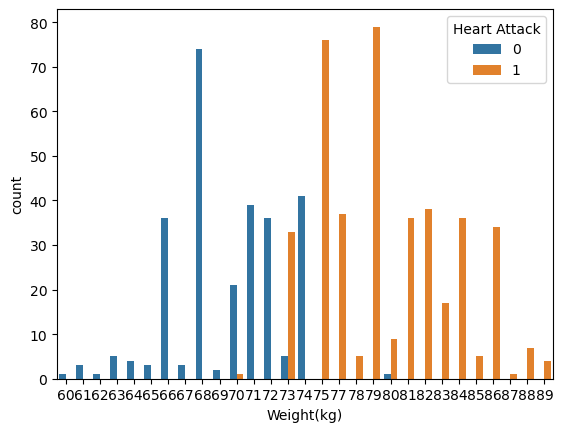

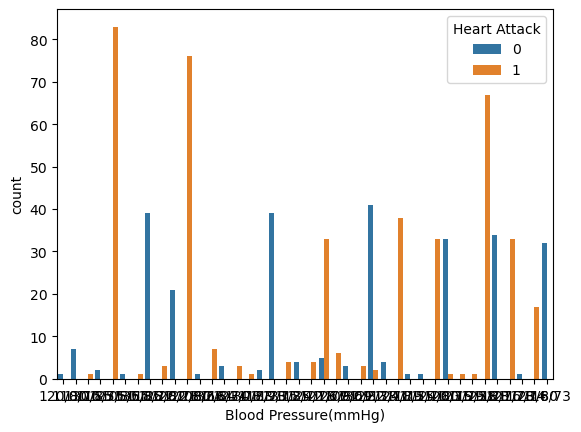

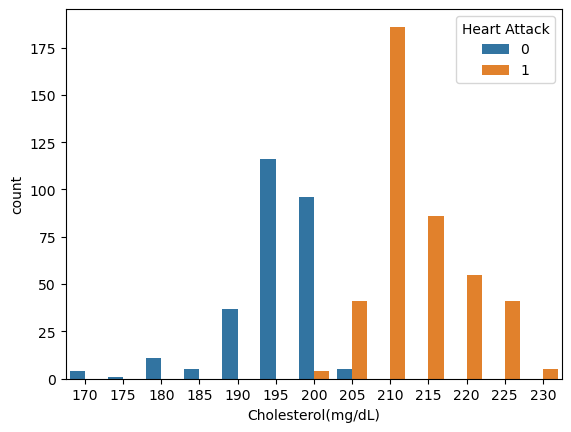

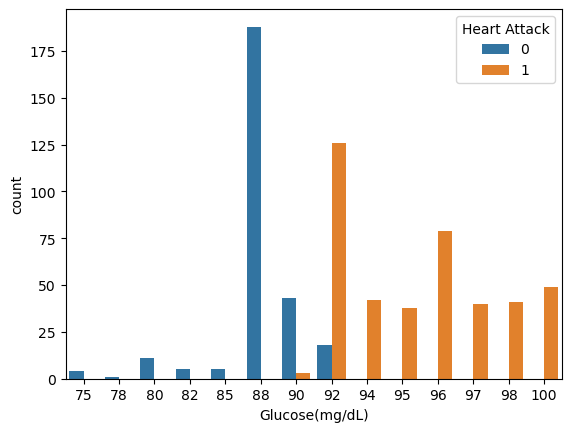

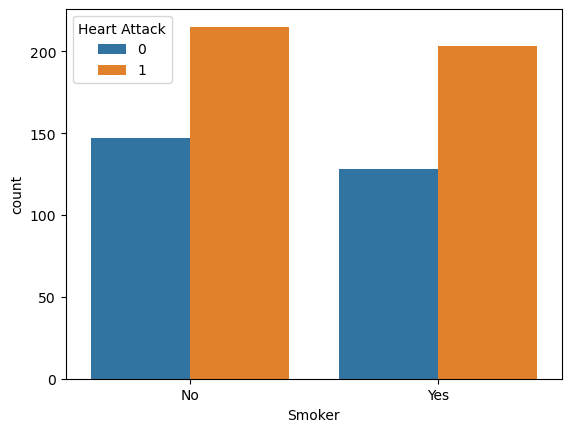

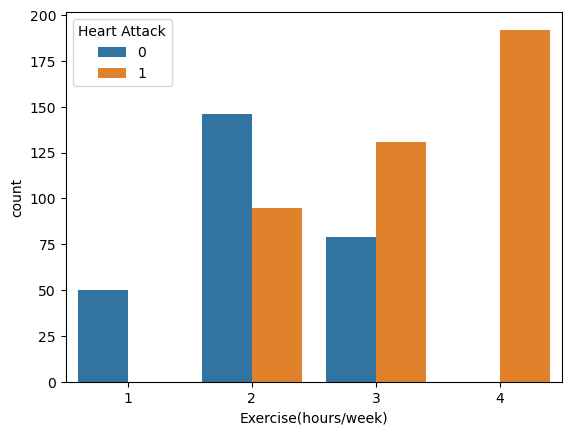

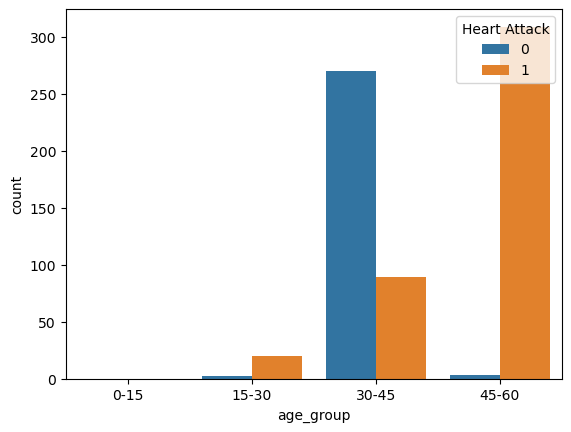

In [23]:
for i, predictor in enumerate(df.drop(columns=['Heart Attack'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Heart Attack')

In [ ]:
''' initial observation found
    1. Usally higher age(above 45) has high rate of heart attack.
    2. Compare to female male has high rate heart of attack.
    3. It looks like above 170cm of hight & more then 73kg of weight has high rate of heart attack
    4. It looks like more cholestrol & more glucose is related to high rate of heart attack
    5. It looks like more excercise(hourse/week) is related to high rate of heart attack might be some other reasone '''

In [14]:
df.head(5)

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,age_group
0,45,Male,175,80,120/80,200,90,No,3,0,30-45
1,35,Female,160,65,110/70,180,80,No,2,0,30-45
2,55,Male,180,85,130/85,220,95,Yes,4,1,45-60
3,40,Female,165,70,115/75,190,85,No,3,0,30-45
4,50,Male,170,75,125/80,210,92,Yes,2,1,45-60


In [24]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
df

,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,age_group
0,0,175,80,120/80,200,90,No,3,0,30-45
1,1,160,65,110/70,180,80,No,2,0,30-45
2,0,180,85,130/85,220,95,Yes,4,1,45-60
3,1,165,70,115/75,190,85,No,3,0,30-45
4,0,170,75,125/80,210,92,Yes,2,1,45-60
...,...,...,...,...,...,...,...,...,...,...
719,1,166,68,118/76,195,88,No,3,0,30-45
720,0,179,83,123/80,220,100,No,2,1,45-60
721,1,167,70,120/78,200,92,No,2,0,30-45
722,0,182,86,125/78,225,98,Yes,2,1,45-60


In [25]:
df['Smoker']=df['Smoker'].replace({'No':0,'Yes':1})

df

,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,age_group
0,0,175,80,120/80,200,90,0,3,0,30-45
1,1,160,65,110/70,180,80,0,2,0,30-45
2,0,180,85,130/85,220,95,1,4,1,45-60
3,1,165,70,115/75,190,85,0,3,0,30-45
4,0,170,75,125/80,210,92,1,2,1,45-60
...,...,...,...,...,...,...,...,...,...,...
719,1,166,68,118/76,195,88,0,3,0,30-45
720,0,179,83,123/80,220,100,0,2,1,45-60
721,1,167,70,120/78,200,92,0,2,0,30-45
722,0,182,86,125/78,225,98,1,2,1,45-60


In [26]:
df.columns

Index(['Gender', 'Height(cm)', 'Weight(kg)', 'Blood Pressure(mmHg)',
       'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Smoker',
       'Exercise(hours/week)', 'Heart Attack', 'age_group'],
      dtype='object')

In [27]:
#Nuremical column
num_columns = df.select_dtypes(include=[np.number])

num_columns


,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,0,175,80,200,90,0,3,0
1,1,160,65,180,80,0,2,0
2,0,180,85,220,95,1,4,1
3,1,165,70,190,85,0,3,0
4,0,170,75,210,92,1,2,1
...,...,...,...,...,...,...,...,...
719,1,166,68,195,88,0,3,0
720,0,179,83,220,100,0,2,1
721,1,167,70,200,92,0,2,0
722,0,182,86,225,98,1,2,1


,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
Gender,1.000000,-0.611516,-0.626738,-0.556947,-0.527750,-0.090936,-0.515672,-0.550383
Height(cm),-0.611516,1.000000,0.974706,0.901294,0.900071,0.135529,0.391972,0.754605
Weight(kg),-0.626738,0.974706,1.000000,0.934179,0.887256,0.128212,0.390228,0.793485
Cholesterol(mg/dL),-0.556947,0.901294,0.934179,1.000000,0.925707,0.011439,0.366471,0.832448
Glucose(mg/dL),-0.527750,0.900071,0.887256,0.925707,1.000000,0.032664,0.337896,0.794999
Smoker,-0.090936,0.135529,0.128212,0.011439,0.032664,1.000000,0.177346,0.019777
Exercise(hours/week),-0.515672,0.391972,0.390228,0.366471,0.337896,0.177346,1.000000,0.591881
Heart Attack,-0.550383,0.754605,0.793485,0.832448,0.794999,0.019777,0.591881,1.000000


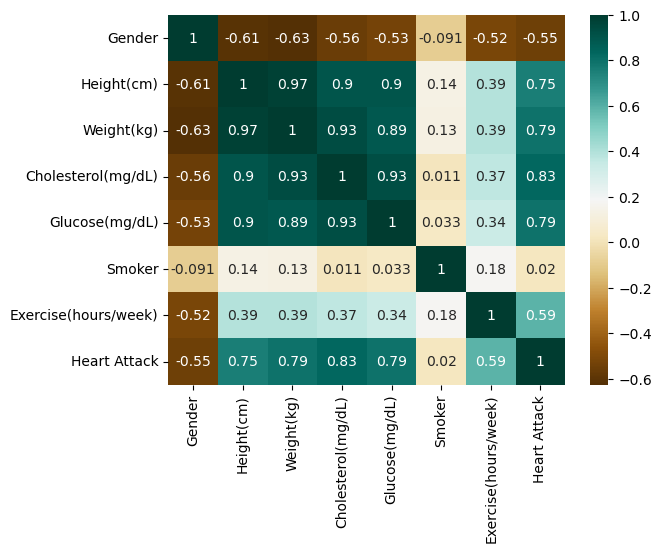

In [28]:
c= num_columns.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
#From correlation map Heart attck is positive related with Glucose(mg/dL),Cholestrol(mg/dL),Weight&Hight.

Findings
    1. Usally higher age(above 45) has high risk rate of heart attack.
    2. Compare to female male has high risk rate heart of attack.
    3. It looks like above 170cm of hight & more then 73kg of weight has high rate of heart attack.
    4. It looks like more cholestrol & more glucose is related to high rate of heart attack.
    5. It looks like more excercise(hourse/week) is related to high rate of heart attack might be some other reasone.